# Imports

In [1]:
import pandas as pd 
import os 
import glob 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as figure_factory

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import joblib
import tensorflow as tf

# Read Data

In [2]:
# Read Files

main_path = "C:/Users/MSI/Desktop/Projet ML/Pneumonia"

train_path = os.path.join(main_path,"train")
test_path = os.path.join(main_path,"test")
val_path = os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")


In [3]:
# train_list contient les emplacements de chaque image
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

# creation du dataframe qui contient la classe et l'emplacement de chaque image
df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal),['Pneumonia']*len(train_pneumonia)]), columns=['class'])
df_train['image']= [x for x in train_list]


test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal),['Pneumonia']*len(test_pneumonia)]), columns=['class'])
df_test['image']= [x for x in test_list]


val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal),['Pneumonia']*len(val_pneumonia)]), columns=['class'])
df_val['image']= [x for x in val_list]


In [4]:
df_train

,class,image
0,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
1,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
2,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
3,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
4,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
...,...,...
5211,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
5212,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
5213,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...
5214,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\train...


In [5]:
df_test

,class,image
0,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
1,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
2,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
3,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
4,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
...,...,...
619,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
620,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
621,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...
622,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\test/...


In [6]:
df_val

,class,image
0,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
1,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
2,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
3,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
4,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
5,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
6,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
7,Normal,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/N...
8,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/P...
9,Pneumonia,C:/Users/MSI/Desktop/Projet ML/Pneumonia\val/P...


# Exploratory Data Analysis

In [7]:
Pneumonia = df_train[(df_train['class'] == 'Pneumonia')]
Normal = df_train[(df_train['class'] == 'Normal')]

trace = go.Bar(x = (len(Pneumonia), len(Normal)), y = ['Pneumonia', 'Normal'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of class variable in train dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [8]:
trace = go.Pie(labels = ['Pneumonia', 'Normal'], values = df_train['class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of class variable in train dataset')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [9]:
Pneumonia = df_test[(df_test['class'] == 'Pneumonia')]
Normal = df_test[(df_test['class'] == 'Normal')]

trace = go.Bar(x = (len(Pneumonia), len(Normal)), y = ['Pneumonia', 'Normal'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of class variable in test dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [10]:
trace = go.Pie(labels = ['Pneumonia', 'Normal'],values = df_test['class'].value_counts(),
               textfont=dict(size=15),opacity=0.8,
               marker=dict(colors=['lightskyblue','gold'],
                           line=dict(color='#000000',width=1.5))
               )
layout = dict(title='Distribution of class variable in test dataset')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# Previewing the images

Train Set - Normal


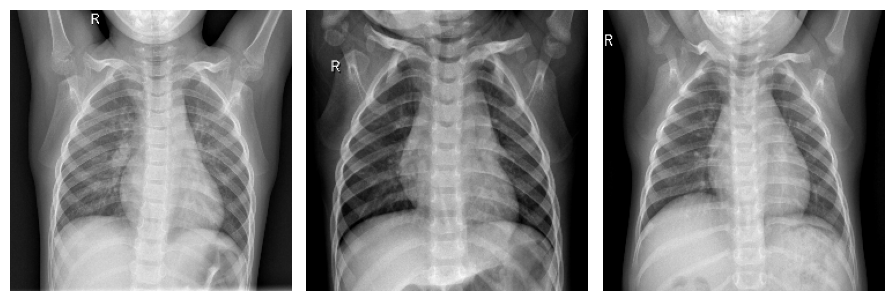

Train Set - Pneumonia


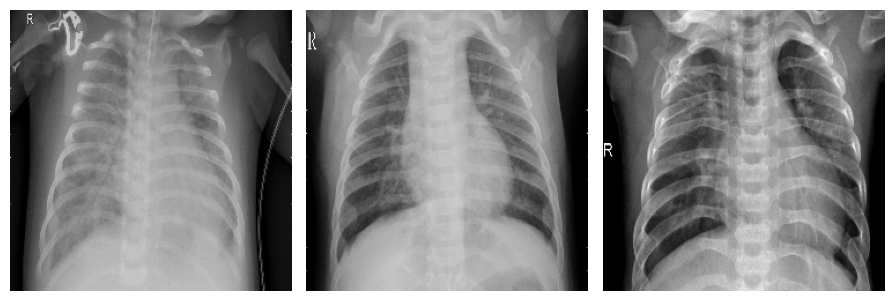

In [11]:
print('Train Set - Normal') 

plt.figure(figsize=(12,12))

for i in range(0,3):
    plt.subplot(3, 4, i+1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (244,244))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

print('Train Set - Pneumonia')
plt.figure(figsize=(12,12))

for i in range(0,3):
    plt.subplot(3,4,i+1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (244,244))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

# Data Splitting

In [12]:
SEED = 42
train_df,val_df = train_test_split(df_train,test_size=0.2,random_state = SEED, 
                                      stratify = df_train['class'])

# Data Augmentation

In [13]:
IMG_SIZE = 224
BATCH = 32
# ImageDataGenerator class allows the users to perform image augmentation while training the model
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   zoom_range = 0.1,
                                   width_shift_range = 0.1,
                                   height_shift_range= 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

# The flow_from_dataframe() method takes the Pandas DataFrame and the path to a directory and generates batches of augmented/normalized data
ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size=(IMG_SIZE,IMG_SIZE),
                                             class_mode='binary',
                                             batch_size=BATCH,
                                             seed=SEED,
                                             )

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size=(IMG_SIZE,IMG_SIZE),
                                             class_mode='binary',
                                             batch_size=BATCH,
                                             seed=SEED,
                                             )


Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# Setting callbakcs

In [14]:
# callbacks.EarlyStopping : is a method that allows you to specify an arbitrary 
# large number of training epochs and stop training once the model performance
# stops improving on a hold out validation dataset.

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)


# Reduce learning rate when a metric has stopped improving
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

# Create Model

In [15]:
def get_model():

    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE,3))


    # Bloc One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs) 
    # Batch normalization applies a transformation that maintains the 
    # mean output close to 0 and the output standard deviation close to 1.
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Bloc Two 
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Bloc Three 
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x) 
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)
    return model

In [16]:
model = get_model()
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=3e-5),metrics='binary_accuracy')
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [17]:
history = model.fit(ds_train,
                    batch_size = 32, epochs = 50,
                    validation_data = ds_val,
                    callbacks=[early_stopping,plateau],
                    steps_per_epoch=(len(train_df)//BATCH),
                    validation_steps=(len(val_df)//BATCH)
                   );

Epoch 1/50
130/130 [==============================] - 152s 1s/step - loss: 0.5246 - binary_accuracy: 0.7536 - val_loss: 1.1457 - val_binary_accuracy: 0.7393 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 146s 1s/step - loss: 0.3586 - binary_accuracy: 0.8304 - val_loss: 1.9790 - val_binary_accuracy: 0.7432 - lr: 3.0000e-05
Epoch 3/50
130/130 [==============================] - ETA: 0s - loss: 0.2690 - binary_accuracy: 0.8829
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 156s 1s/step - loss: 0.2690 - binary_accuracy: 0.8829 - val_loss: 2.0129 - val_binary_accuracy: 0.7432 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 156s 1s/step - loss: 0.2361 - binary_accuracy: 0.9010 - val_loss: 1.4588 - val_binary_accuracy: 0.7422 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 161s 1s/step - loss: 0.2198 - binary_accuracy: 0.9092 - val_loss: 0.5314 - val_bi

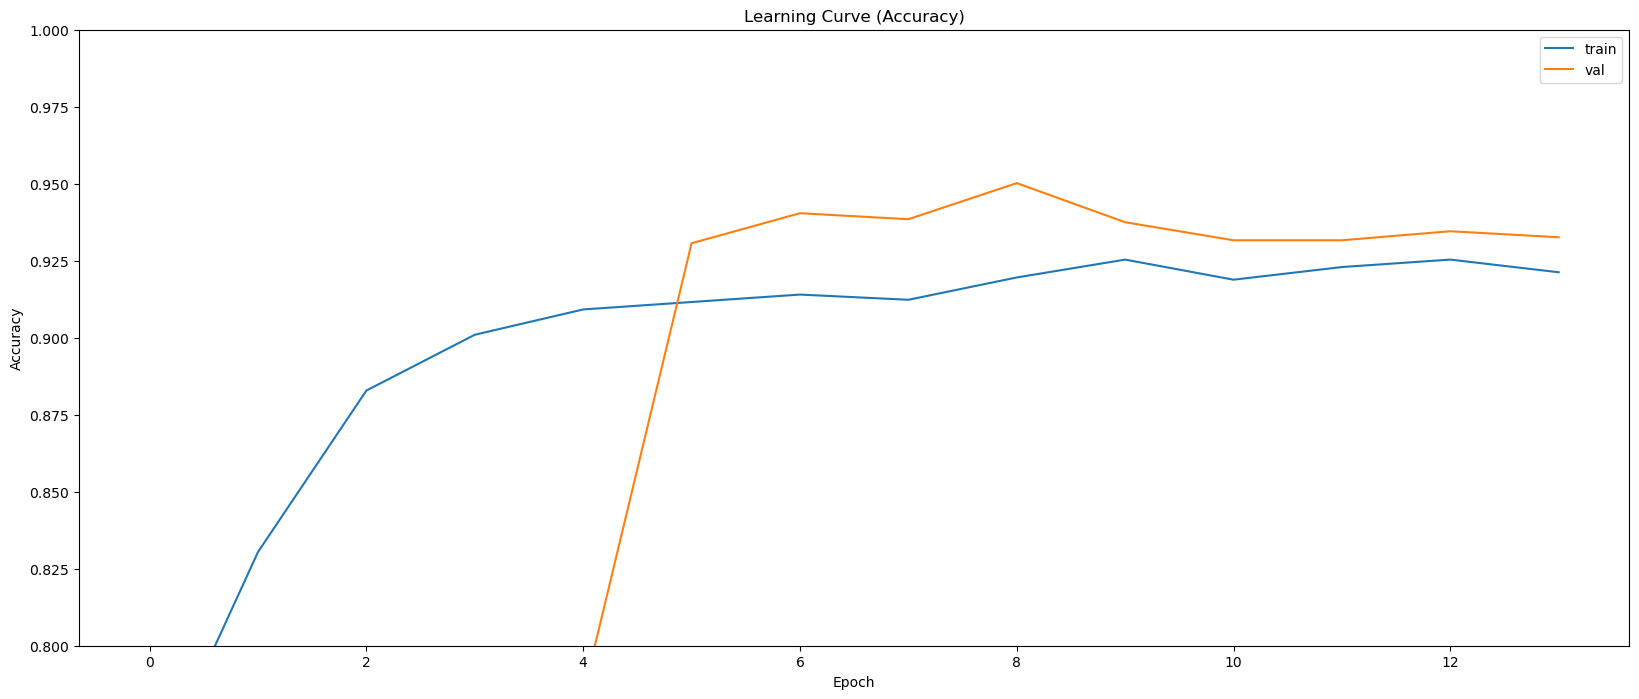

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x= history.epoch, y = history.history['val_binary_accuracy'])

ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.8, 1.0)
ax.legend(['train','val'], loc='best')
plt.show()

In [25]:
score = model.evaluate(ds_val,steps=len(df_test),verbose = 0)

In [26]:
print('Val loss:', score[0])
print('Val accuracy:', score[1]) 

Val loss: 0.14149154722690582
Val accuracy: 0.946360170841217


In [27]:
score = model.evaluate(ds_test,steps=len(df_test),verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.5380926132202148
Test accuracy: 0.7964743375778198


# ResNet

In [28]:
#ResNet

base_model = tf.keras.applications.resnet_v2.ResNet152V2(weights='imagenet',
                                             input_shape=(IMG_SIZE, IMG_SIZE,3),
                                             include_top=False)

base_model.trainable = False 


# globalAveragePooling2d() function is used
# for applying global average pooling operation for spatial data.

def get_pretrained():
    
    inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
    x = base_model(inputs)
    
    
    #HEAD
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1,activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs],outputs=output)
    
    return model

234545216/234545216 [==============================] - 395s 2us/step


In [29]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy',optimizer= keras.optimizers.Adam(learning_rate=5e-5),
                         metrics='binary_accuracy')
model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [30]:
history = model_pretrained.fit(ds_train, batch_size = BATCH,
                              epochs = 50, validation_data = ds_val,
                              callbacks=[early_stopping,plateau],
                              steps_per_epoch=(len(train_df)//BATCH),
                              validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 499s 4s/step - loss: 0.3331 - binary_accuracy: 0.8597 - val_loss: 0.1944 - val_binary_accuracy: 0.9215 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 475s 4s/step - loss: 0.1911 - binary_accuracy: 0.9309 - val_loss: 0.1491 - val_binary_accuracy: 0.9435 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 454s 3s/step - loss: 0.1553 - binary_accuracy: 0.9396 - val_loss: 0.1261 - val_binary_accuracy: 0.9511 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 453s 3s/step - loss: 0.1463 - binary_accuracy: 0.9493 - val_loss: 0.1479 - val_binary_accuracy: 0.9358 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 462s 4s/step - loss: 0.1424 - binary_accuracy: 0.9486 - val_loss: 0.1108 - val_binary_accuracy: 0.9598 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 457s 4s/step - loss: 0.1329 - binary_accuracy: 0.9498 - val_loss: 0.1356 - v

In [31]:
model_pretrained.save("model_pretrained.h5")

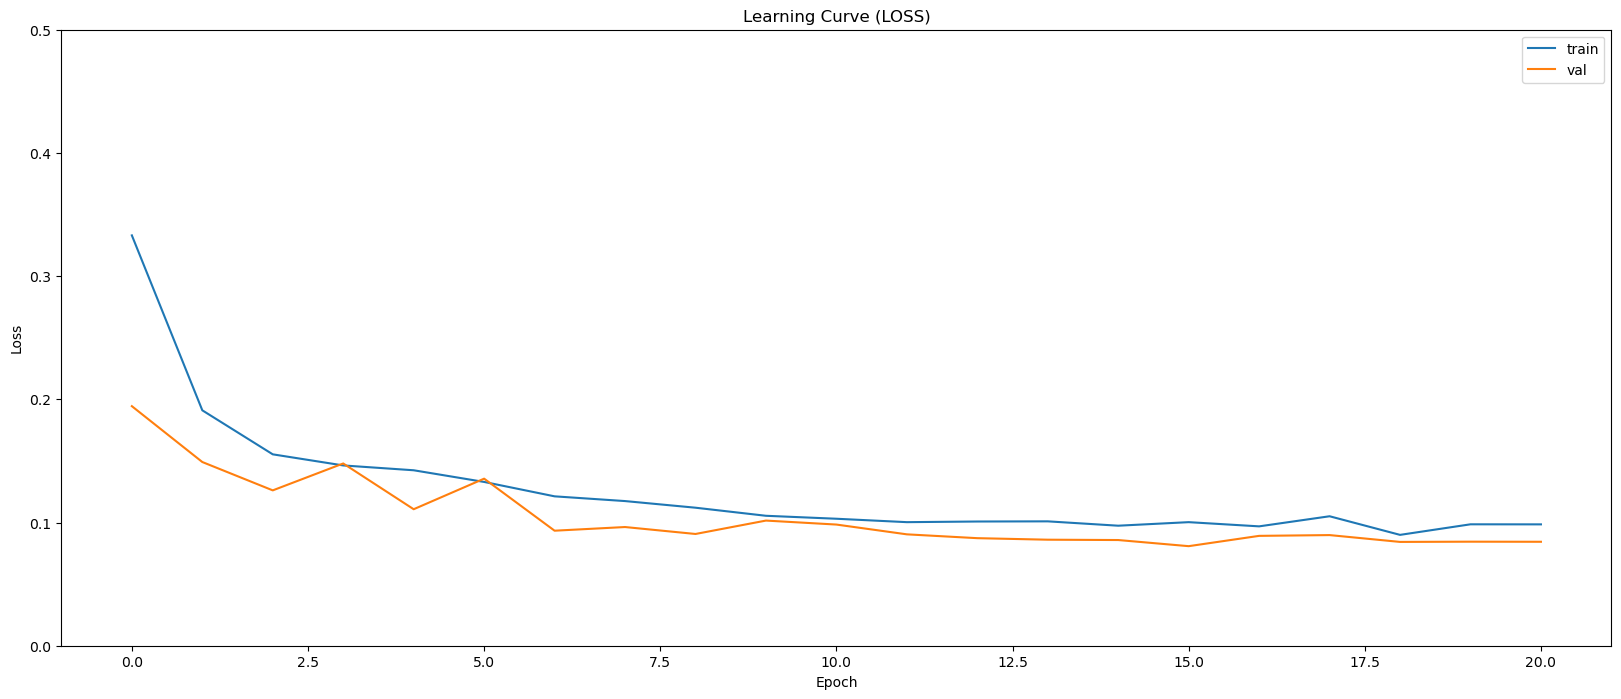

In [32]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history.epoch, y = history.history['loss'])
sns.lineplot(x= history.epoch, y= history.history['val_loss'])
ax.set_title('Learning Curve (LOSS)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0,0.5)
ax.legend(['train','val'],loc='best')
plt.show()

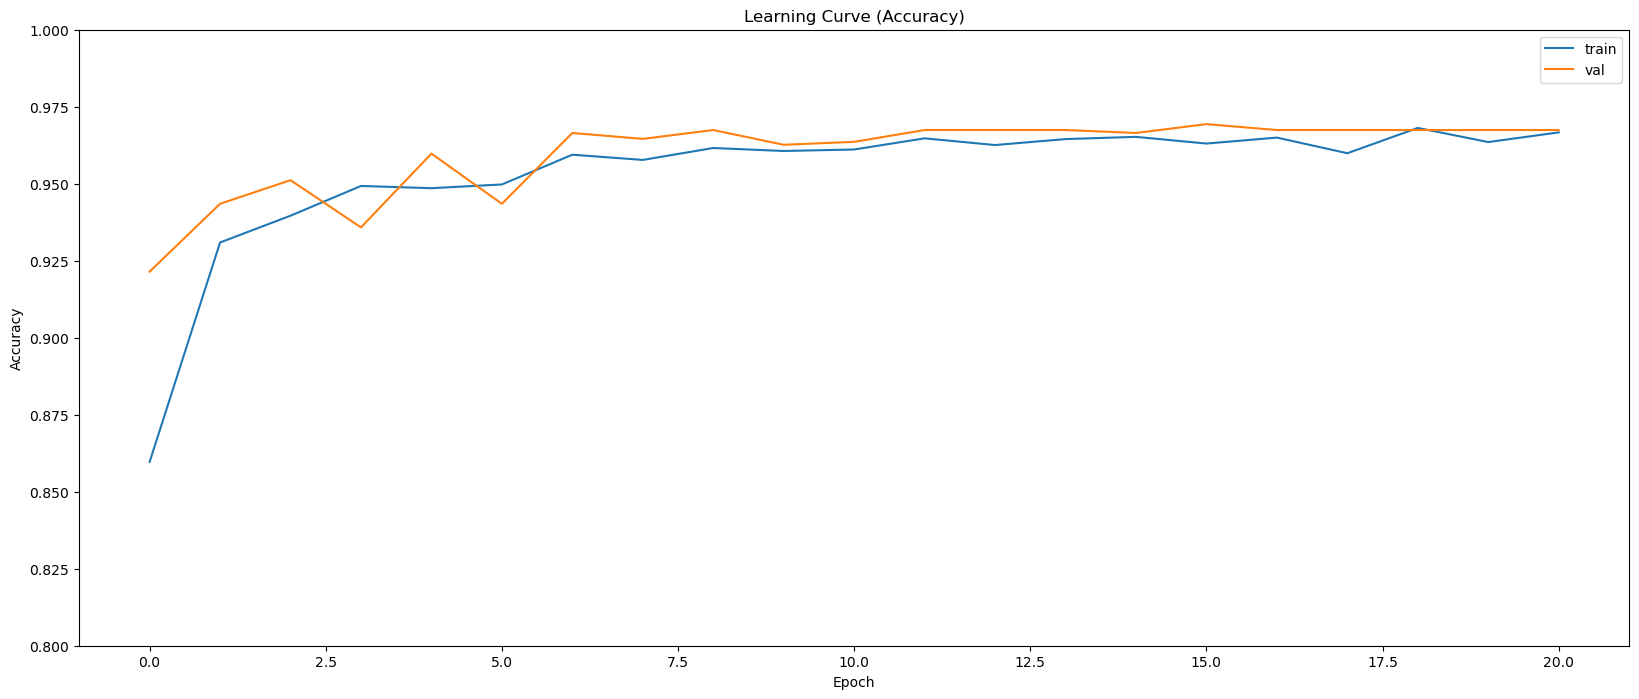

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x= history.epoch, y= history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.8,1)
ax.legend(['train','val'],loc='best')
plt.show()

In [34]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.08081024140119553
Val accuracy: 0.969348669052124


In [35]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.46151643991470337
Test accuracy: 0.8413461446762085


# Fine Tuning

In [36]:
#Fine Tuning 

base_model.trainable=True

for layers in base_model.layers[:-20]:
    layers.trainable = False
    

In [37]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number,layer.name,layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [38]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 25,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/25
130/130 [==============================] - 441s 3s/step - loss: 0.0957 - binary_accuracy: 0.9645 - val_loss: 0.0817 - val_binary_accuracy: 0.9684 - lr: 4.0000e-07
Epoch 2/25
130/130 [==============================] - 441s 3s/step - loss: 0.0960 - binary_accuracy: 0.9648 - val_loss: 0.0824 - val_binary_accuracy: 0.9674 - lr: 4.0000e-07
Epoch 3/25
131/130 [==============================] - ETA: -1s - loss: 0.0930 - binary_accuracy: 0.9624
Epoch 3: ReduceLROnPlateau reducing learning rate to 8.00000009348878e-08.
130/130 [==============================] - 452s 3s/step - loss: 0.0930 - binary_accuracy: 0.9624 - val_loss: 0.0828 - val_binary_accuracy: 0.9674 - lr: 4.0000e-07
Epoch 4/25
130/130 [==============================] - 466s 4s/step - loss: 0.1037 - binary_accuracy: 0.9624 - val_loss: 0.0829 - val_binary_accuracy: 0.9674 - lr: 8.0000e-08
Epoch 5/25
131/130 [==============================] - ETA: -1s - loss: 0.0993 - binary_accuracy: 0.9638
Epoch 5: ReduceLROnPlateau reduc

In [39]:
model_pretrained.save("model_pretrained.h5")

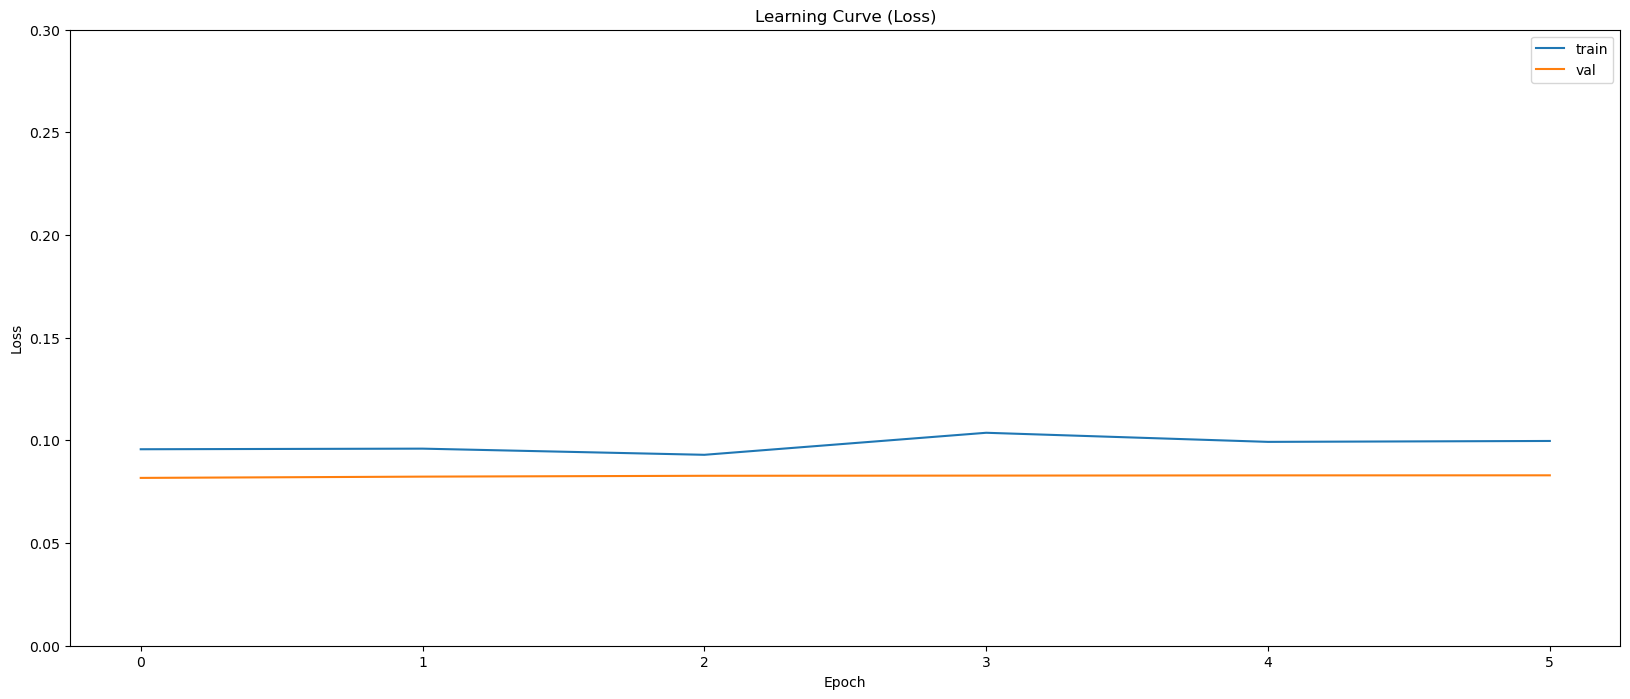

In [40]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

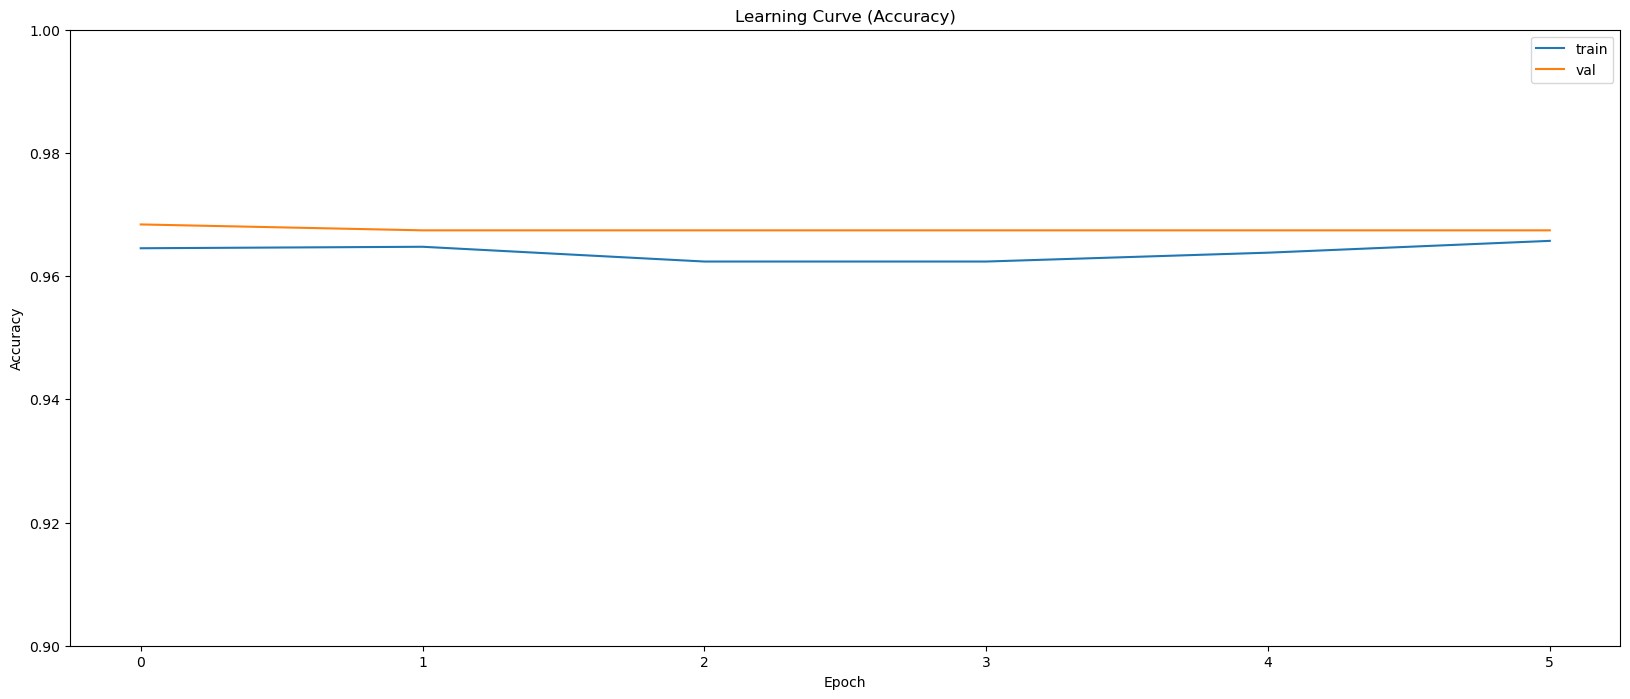

In [41]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

# Evaluation

In [42]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.08173094689846039
Val accuracy: 0.9683908224105835


In [43]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4548720419406891
Test accuracy: 0.8429487347602844
